In [1]:
# Import Libraries
import pandas as pd  # Library untuk manipulasi data dalam bentuk DataFrame
import numpy as np  # Library untuk komputasi numerik, operasi array, dan matriks
import matplotlib.pyplot as plt  # Library untuk membuat visualisasi grafik
import seaborn as sns  # Library untuk visualisasi data statistik
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE  # Teknik untuk menangani data yang tidak seimbang dengan oversampling kelas minoritas

In [2]:
# Load Data
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\ドキュメント\Folder skripsi\SKRIPSI\Near_Earth_Objects_Dataset.csv')
df.head()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous,full_name,moid,last_obs
0,2162117,19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False,162117 (1998 SD15),0.1110,2018-08-12
1,2349507,18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True,349507 (2008 QY),0.0307,2023-12-12
2,2455415,21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False,455415 (2003 GA),0.0618,2022-11-16
3,3132126,20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False,(2002 PB),0.1670,2022-08-31
4,3557844,22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False,(2011 DW),0.0349,2021-03-06


In [3]:
# Menampilkan jumlah data (jumlah baris dan kolom)
print("Jumlah data (baris, kolom):", df.shape)

Jumlah data (baris, kolom): (302650, 11)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302650 entries, 0 to 302649
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  302650 non-null  int64  
 1   absolute_magnitude      302649 non-null  float64
 2   estimated_diameter_min  302649 non-null  float64
 3   estimated_diameter_max  302649 non-null  float64
 4   orbiting_body           302650 non-null  object 
 5   relative_velocity       302650 non-null  float64
 6   miss_distance           302650 non-null  float64
 7   is_hazardous            302650 non-null  bool   
 8   full_name               302650 non-null  object 
 9   moid                    302650 non-null  float64
 10  last_obs                302650 non-null  object 
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 23.4+ MB


In [5]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,moid
count,3.026500e+05,302649.000000,302649.000000,302649.000000,302650.000000,3.026500e+05,3.026500e+05
mean,1.797544e+07,23.167612,0.138659,0.310052,50424.260835,4.113047e+07,7.076597e-02
std,2.302834e+07,2.866935,0.257564,0.575931,26098.501344,2.090881e+07,8.386107e-02
min,2.000433e+06,10.410000,0.000511,0.001143,203.346433,6.745533e+03,1.520000e-07
25%,3.409434e+06,21.000000,0.023150,0.051765,30226.943368,2.432873e+07,1.050000e-02
50%,3.750662e+06,23.100000,0.063761,0.142574,46930.406291,4.278890e+07,3.540000e-02
75%,5.405478e+07,25.300000,0.167708,0.375008,65893.184960,5.911675e+07,1.030000e-01
max,5.445588e+07,33.580000,22.006703,49.208483,279142.249206,7.479865e+07,5.040000e-01


In [6]:
# Menampilkan jumlah nilai yang hilang pada setiap kolom
print("Jumlah missing values per kolom:\n", df.isnull().sum())

# Menghitung jumlah duplikat
duplicate_count = df.duplicated().sum()
print(f'Jumlah duplikat: {duplicate_count}')

Jumlah missing values per kolom:
 neo_id                    0
absolute_magnitude        1
estimated_diameter_min    1
estimated_diameter_max    1
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
full_name                 0
moid                      0
last_obs                  0
dtype: int64
Jumlah duplikat: 0


In [7]:
# Hapus baris yang memiliki missing values
df.dropna(subset=['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max'], inplace=True)

# Cek kembali jumlah missing values
print(df.isnull().sum())

neo_id                    0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
full_name                 0
moid                      0
last_obs                  0
dtype: int64


In [8]:
# Cari NEO dengan pengamatan terakhir
last_observed_neo = df.loc[df['last_obs'].idxmax()]
print("NEO yang terakhir diamati:")
print(last_observed_neo)

NEO yang terakhir diamati:
neo_id                              3616697
absolute_magnitude                    21.36
estimated_diameter_min             0.142087
estimated_diameter_max             0.317717
orbiting_body                         Earth
relative_velocity              71327.583068
miss_distance               55774305.852556
is_hazardous                          False
full_name                        (2012 VN6)
moid                                  0.216
last_obs                         2025-01-05
Name: 63, dtype: object


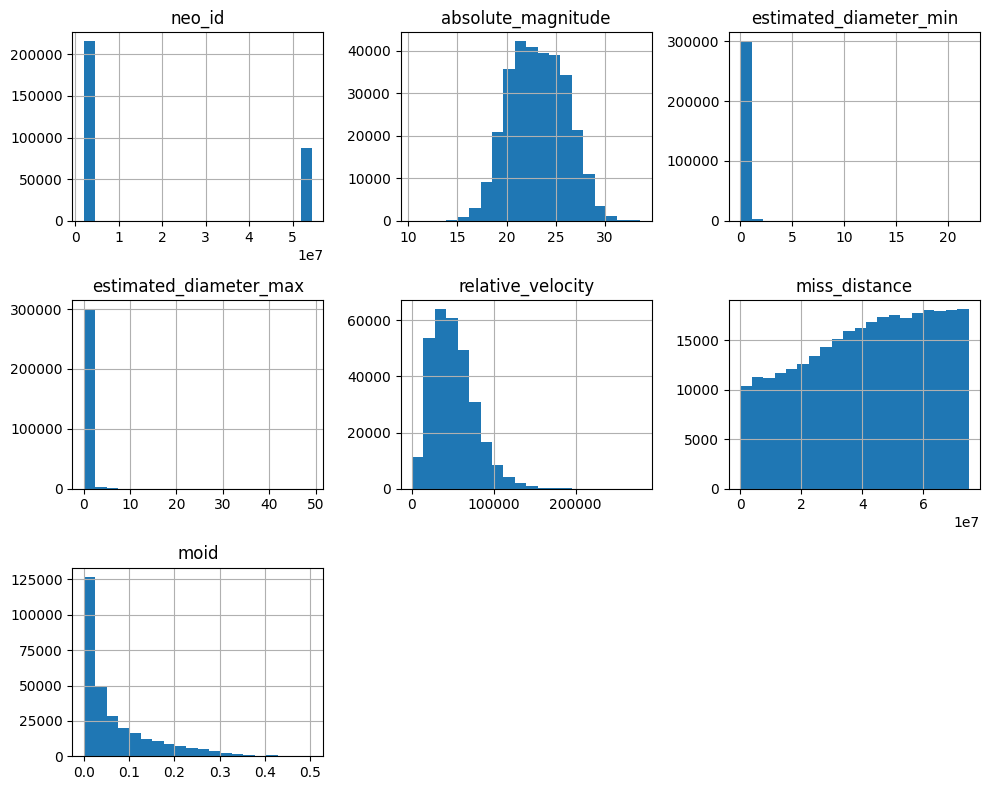

In [9]:
# Membuat histogram untuk semua kolom numerik
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [10]:
top_10_closest = df.nsmallest(10, 'miss_distance')

fig5 = px.bar(top_10_closest, 
              x='miss_distance', 
              y='full_name', 
              title='Top 10 Closest NEOs to Earth', 
              text_auto=True,
              labels={'miss_distance': 'Miss Distance (km)', 'full_name': 'NEO Name'},
              color_discrete_sequence=['#1DB954'],
              width=1200, 
              height=800  )

fig5.show()

                        absolute_magnitude  estimated_diameter_min  \
absolute_magnitude                1.000000               -0.626810   
estimated_diameter_min           -0.626810                1.000000   
estimated_diameter_max           -0.626810                1.000000   
relative_velocity                -0.340918                0.236537   
miss_distance                    -0.207899                0.119994   
moid                             -0.533678                0.318012   

                        estimated_diameter_max  relative_velocity  \
absolute_magnitude                   -0.626810          -0.340918   
estimated_diameter_min                1.000000           0.236537   
estimated_diameter_max                1.000000           0.236537   
relative_velocity                     0.236537           1.000000   
miss_distance                         0.119994           0.330628   
moid                                  0.318012           0.069681   

                        m

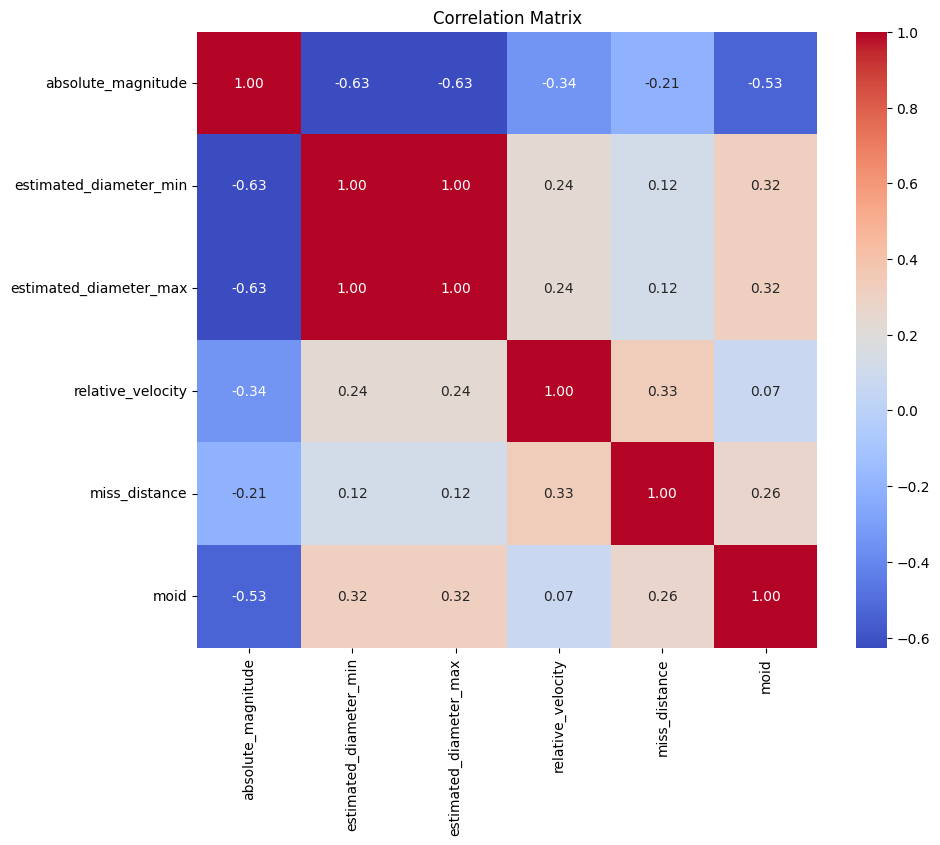

In [11]:
# Pilih hanya kolom numerik yang relevan untuk korelasi
numeric_columns = [
    'absolute_magnitude', 
    'estimated_diameter_min', 
    'estimated_diameter_max', 
    'relative_velocity', 
    'miss_distance', 
    'moid'
]

# Ambil subset DataFrame hanya untuk kolom numerik yang relevan
numeric_data = df[numeric_columns]

# Hitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Tampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

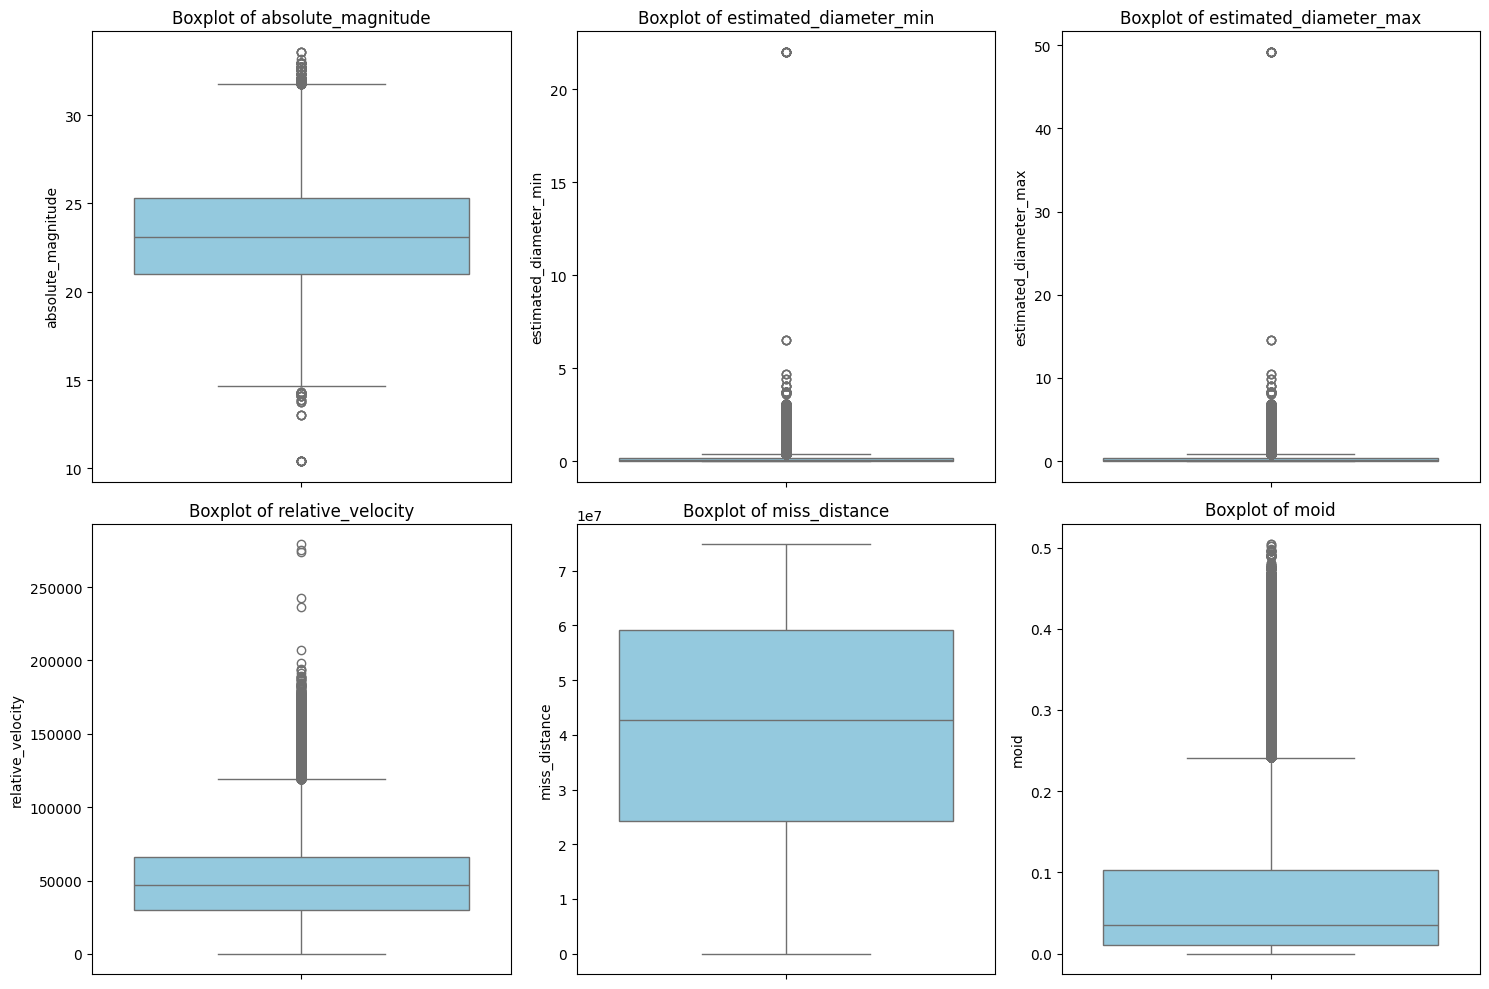

In [12]:
# Plot boxplot untuk setiap kolom
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Membuat grid subplot 2x3
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

is_hazardous
False    267017
True      35632
Name: count, dtype: int64


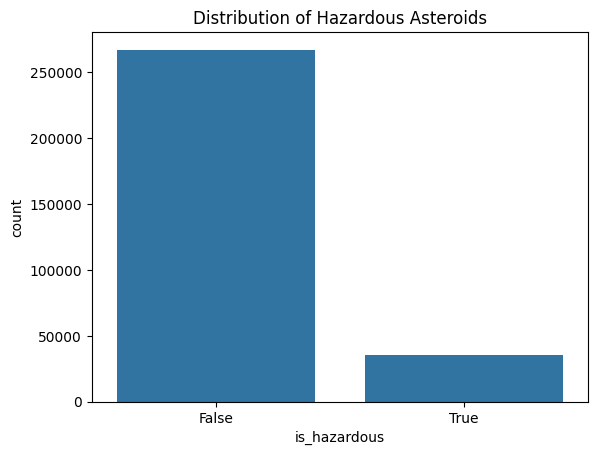

In [13]:
# Cek distribusi label target (y)
# 'Hazardous' adalah target label
print(df['is_hazardous'].value_counts())
sns.countplot(x='is_hazardous', data=df)
plt.title('Distribution of Hazardous Asteroids')
plt.show()

In [14]:
# Transformasi logaritmik pada kolom yang skewed
df['moid'] = np.log1p(df['moid'])
df['estimated_diameter_min'] = np.log1p(df['estimated_diameter_min'])
df['estimated_diameter_max'] = np.log1p(df['estimated_diameter_max'])

In [15]:
categorical_features = df.select_dtypes(include=['object', 'category','bool']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['orbiting_body', 'is_hazardous', 'full_name', 'last_obs']
Numerical Features: ['neo_id', 'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'moid']


In [16]:
label_encoding = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoding.fit_transform(df[col])

In [17]:
numerical_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 
                       'relative_velocity', 'miss_distance']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [18]:
df = df.drop(columns=['full_name', 'neo_id', 'last_obs', 'orbiting_body' ])

In [19]:
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,moid
0,-1.404852,1.458702,1.572803,0.816947,0.813685,0,0.105261
1,-1.628087,2.083379,2.152058,2.280802,0.701647,1,0.030238
2,-0.599112,0.075635,0.147109,-0.979324,1.247151,0,0.059966
3,-0.885132,0.436994,0.542769,1.090705,-0.513372,0,0.154436
4,-0.163105,-0.288098,-0.272000,0.215038,1.051623,0,0.034305


In [20]:
# Menyimpan DataFrame sebagai CSV
df.to_csv('data_preprocessed.csv', index=False)